In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [55]:
df = pd.read_csv('wine_data.csv')

In [56]:
#data = data[["country", "points", "province", "variety", "winery", "price"]]
df = df[["country", "points", "province", "variety", "price"]]

In [57]:
df=df.dropna()
df.head()

,country,points,province,variety,price
1,Portugal,87,Douro,Portuguese Red,15.0
2,US,87,Oregon,Pinot Gris,14.0
3,US,87,Michigan,Riesling,13.0
4,US,87,Oregon,Pinot Noir,65.0
5,Spain,87,Northern Spain,Tempranillo-Merlot,15.0


In [58]:
df['variety_count']= df.variety.map(df.variety.value_counts())
data = df[df.variety_count != 1]
data.variety_count.value_counts()
df.shape

(120915, 6)

In [59]:
df.drop(df.loc[df['price']>500].index, inplace=True)
df.shape

(120824, 6)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120824 entries, 1 to 129970
Data columns (total 6 columns):
country          120824 non-null object
points           120824 non-null int64
province         120824 non-null object
variety          120824 non-null object
price            120824 non-null float64
variety_count    120824 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.5+ MB


In [61]:
df.province.value_counts()

California                   36099
Washington                    8583
Oregon                        5359
Tuscany                       5121
Bordeaux                      3978
Northern Spain                3795
Mendoza Province              3226
Piedmont                      3088
Burgundy                      3083
New York                      2676
Veneto                        2314
Alsace                        2147
Northeastern Italy            1986
Loire Valley                  1597
Sicily & Sardinia             1559
Champagne                     1377
Southwest France              1335
South Australia               1327
Catalonia                     1152
Provence                      1139
Douro                         1134
Southern Italy                1131
Central Italy                 1100
Rhône Valley                  1042
Mosel                         1023
Beaujolais                     846
Colchagua Valley               821
Alentejano                     821
Marlborough         

In [62]:
df.describe()

,points,price,variety_count
count,120824.000000,120824.000000,120824.000000
mean,88.416258,34.752094,5133.719029
std,3.038743,31.666149,4387.609099
min,80.000000,4.000000,1.000000
25%,86.000000,17.000000,1211.000000
50%,88.000000,25.000000,4086.000000
75%,91.000000,42.000000,9384.000000
max,100.000000,500.000000,12785.000000


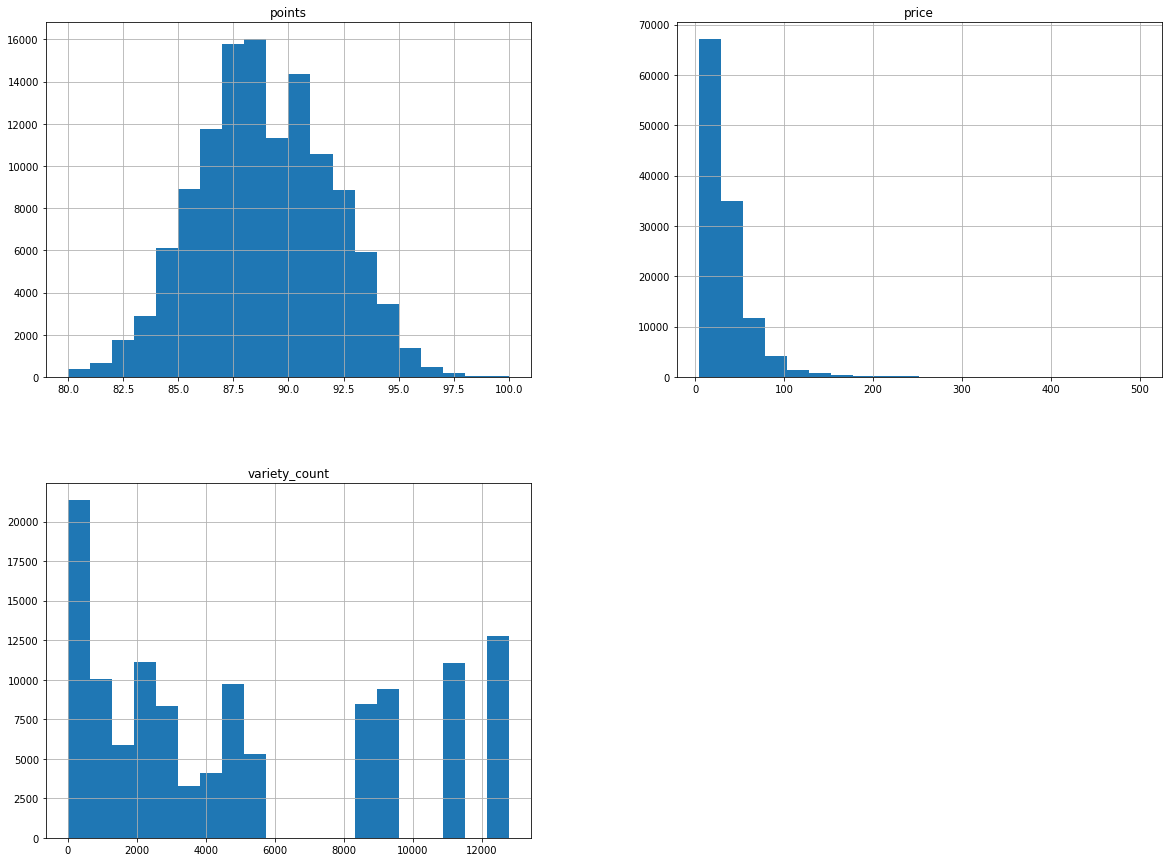

In [63]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

In [64]:
data_new = pd.get_dummies(df)


In [65]:
data_new.shape

(120824, 1158)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = data_new["price"]
X =data_new.drop(columns=["price"])
y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [67]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [68]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5991976213502936, R2: 0.35054130324099714


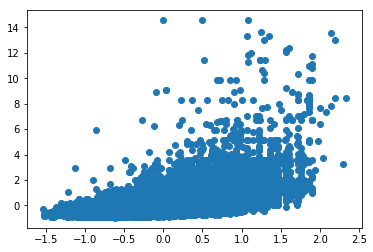

In [70]:
plt.scatter(predictions, y_test_scaled)

In [71]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5875324068153472, R2: 0.3631850033481635


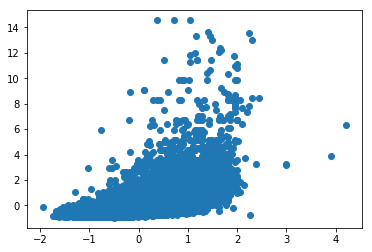

In [72]:
plt.scatter(predictions, y_test_scaled)

In [73]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5919792721682846, R2: 0.3583651321172443


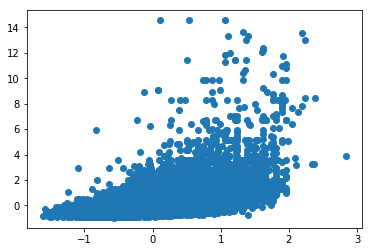

In [74]:
plt.scatter(predictions, y_test_scaled)